In [91]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(tidymodels)
  library(readxl)
  library(multcomp)
  library(car)
})

## Cobb Douglas Function

### Log-log model (Double log) (Constant elasticity) (log-linear)

\begin{align}
\text{output} &= \beta_0 \text{labor}^{\beta_1}\text{capital}^{\beta_2}\\
\ln \text{output}_i &= \ln \beta_0 + \beta_1 \ln \text{labor}_i + \beta_2 \ln \text{capital}_i +u
\end{align}

labor input (worker hours, in thousands),  
and capital input (capital expenditure, in thousands of dollars) for the US manufacturing sector.   
The data is cross-sectional, covering 50 states and Washington, DC, for the year 2005. 

In [2]:
df <- read_excel("G:/Datasets/Econometrics BY Example/Excel/Table2_1.xls")
head(df)

obs,output,labor,capital,lnoutput,lnlabor,lncapital,lnoutlab,lncaplab,outputstar,capitalstar,laborstar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38372840,424471,2689076,17.46286,12.958599,14.80471,4.504261,1.846109,-0.1079874,0.06368887,0.1343891
2,1805427,19895,57997,14.40631,9.898224,10.96815,4.508084,1.069923,-0.9230660,-0.90551400,-0.9410533
3,23736129,206893,2308272,16.98251,12.239957,14.65201,4.742552,2.412053,-0.4342360,-0.07658678,-0.4439759
4,26981983,304055,1376235,17.11068,12.624964,14.13486,4.485716,1.509898,-0.3618868,-0.41991854,-0.1857003
5,217546032,1809756,13554116,19.19792,14.408703,16.42220,4.789218,2.013498,3.8857391,4.06601191,3.8167481
6,19462751,180366,1790751,16.78401,12.102743,14.39815,4.681270,2.295402,-0.5294886,-0.26722449,-0.5144899


In [3]:
model <- lm(lnoutput~ lnlabor+ lncapital, data = df)

In [4]:
tidy(model)
glance(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.8875990,0.39622813,9.811517,4.704731e-13
lnlabor,0.4683318,0.09892588,4.734169,1.980888e-05
lncapital,0.5212795,0.09688703,5.380281,2.183108e-06


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9641754,0.9626828,0.266752,645.9316,1.996821e-35,2,-3.426703,14.85341,22.58071,3.415518,48,51


**interpretation of the coefficient of lnlabor** of about 0.47 is that if we
increase the labor input by 1%, on average, output goes up by about 0.47 %, holding
the capital input constant

**interpretation of the coefficient of lncapital** of about 0.52 is that if we increase capital input by 1%, on average, the output increases by about 0.52%, holding the labot input constant

In [5]:
tidy_model <- tidy(model)
colnames(tidy_model)
rownames(tidy_model)

[1] "term"      "estimate"  "std.error" "statistic" "p.value"

[1] "1" "2" "3"

In [6]:
(intercept <- tidy_model[[1,'estimate']])
exp(intercept)

[1] 3.887599

[1] 48.79359

In [7]:
(beta_1 <- tidy_model[[2, 'estimate']])
(beta_2 <- tidy_model[[3, 'estimate']])

[1] 0.4683318

[1] 0.5212795

In [8]:
(return_to_scale <- beta_1 + beta_2)

[1] 0.9896113

$$ output = 48.79 \text{labour}^{0.47} \text{capital}^{0.51} $$

### linear model

$$ \text{output} =  \beta_0 + \beta_1  \text{labor} + \beta_2  \text{capital} $$

In [9]:
model2 <- lm(output~ labor + capital, data = df)
tidy(model2)
glance(model2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.336216e+05,1.250364e+06,0.1868428,8.525714e-01
labor,4.798736e+01,7.058245e+00,6.7987660,1.496564e-08
capital,9.951891e+00,9.781165e-01,10.1745459,1.433023e-13


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9810653,0.9802763,6300694,1243.514,4.510314e-42,2,-869.2846,1746.569,1754.297,1.90554e+15,48,51


In [10]:
tidy_model2 <- tidy(model2)
as.numeric(tidy_model2$estimate)
as.numeric(tidy_model2$p.value)

[1] 2.336216e+05 4.798736e+01 9.951891e+00

[1] 8.525714e-01 1.496564e-08 1.433023e-13

 If labor input increases by a **unit**, the average output goes up by about 48
**units**, holding capital constant

## Linear restriction

$$\beta_1 + \beta_2 = 1$$
$$\beta_1 = 1 - \beta_2  $$

### Manual calculation

$$ \ln \text{output}_i = \ln \beta_0 + \beta_1 \ln \text{labor}_i + \beta_2 \ln \text{capital}_i + u_i $$

$$ \ln \text{output}_i = \ln \beta_0 + (1- \beta_2) \ln \text{labor}_i + \beta_2 \ln \text{capital}_i + u_i$$

$$
\ln \text{output}_i - \ln \text{labor}_i = \ln \beta_0 + 
\beta_2(\ln \text{capital}_i - \ln \text{labor}_i) + u_i
$$

$$\ln \left (\frac{\text{output}_i}{\text{labor}_i} \right) = \ln \beta_0 + \beta_2 \ln \left(\frac{\text{capital}_i}{\text{labor}_i}\right) + u_i $$

$$F = \frac{(\text{RSS}_{R} -\text{RSS}_{UR}) / m}{\text{RSS}_{UR} / (n - k)} \sim F_{m,n-k}
$$

$RSS_R$= residual sum of squares from the restricted regression  
$RSS_{UR}$= residual sum of squares from the unrestricted regression  
$m$ = number of linear restrictions (1 here)  
$k$ = number of parameters in the unrestricted regression (3 here) 

In [11]:
model3 <- lm(log(output/labor) ~ log(capital/labor), data = df)
tidy(model3)
glance(model3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.7562419,0.18536786,20.263717,1.816211e-25
log(capital/labor),0.5237564,0.09581225,5.466487,1.535206e-06


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3788227,0.3661456,0.2644047,29.88247,1.535206e-06,1,-3.501733,13.00347,18.79894,3.425582,49,51


In [12]:
summary(model3)


Call:
lm(formula = log(output/labor) ~ log(capital/labor), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43644 -0.12465 -0.05083  0.04356  1.23075 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.75624    0.18537  20.264  < 2e-16 ***
log(capital/labor)  0.52376    0.09581   5.466 1.54e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2644 on 49 degrees of freedom
Multiple R-squared:  0.3788,	Adjusted R-squared:  0.3661 
F-statistic: 29.88 on 1 and 49 DF,  p-value: 1.535e-06


In [13]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
lnlabor,1,89.864812,89.86481250,1262.91571,3.933902e-36
lncapital,1,2.059801,2.05980082,28.94742,2.183108e-06
Residuals,48,3.415518,0.07115662,NA,NA


In [85]:
colnames(anova(model))
rownames(anova(model))

[1] "Df"      "Sum Sq"  "Mean Sq" "F value" "Pr(>F)"

[1] "lnlabor"   "lncapital" "Residuals"

In [15]:
(RSSur <- anova(model)["Residuals","Sum Sq"])
(DFur <-anova(model)["Residuals","Df"])

[1] 3.415518

[1] 48

In [16]:
anova(model3)
(RSSr <- anova(model3)["Residuals","Sum Sq"])

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(capital/labor),1,2.089079,2.08907903,29.88247,1.535206e-06
Residuals,49,3.425582,0.06990984,NA,NA


[1] 3.425582

In [17]:
(f = ((RSSr-RSSur)/1)/(RSSur/(DFur)))

[1] 0.1414405

In [81]:
(p_value <- pf(f, 1, DFur, lower.tail = FALSE))

[1] 0.7085103

**conclusion**: The restirction was correct, can use restricted model

### using car package

In [88]:
unrestricted_model <- lm(log(output) ~ log(labor) + log(capital), data = df)
hypothesis <- "log(labor) + log(capital) = 1"

(test_result <- linearHypothesis(unrestricted_model, hypothesis))


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49,3.425582,NA,NA,NA,NA
2,48,3.415520,1,0.01006201,0.1414065,0.7085437


## Log-lin model (growth model)

$$
\text{RGDP}_t = \text{RGDP}_{1960}(1+r)^t
$$

$$
\ln \text{RGDP}_t = \ln \text{RGDP}_{1960}+ t \ln(1+r)
$$

$$
\ln \text{RGDP}_t = \beta_0 + \beta_1t + u_t
$$

In [19]:
df2 <- read_excel("G:/Datasets/Econometrics BY Example/Excel/Table2_5.xls")
head(df2,3)
tail(df2,3)

rgdp,time,time2,lnrgdp
<dbl>,<dbl>,<dbl>,<dbl>
2501.8,1,1,7.824766
2560.0,2,4,7.847763
2715.2,3,9,7.906621


rgdp,time,time2,lnrgdp
<dbl>,<dbl>,<dbl>,<dbl>
10989.5,46,2116,9.304695
11294.8,47,2209,9.332098
11523.9,48,2304,9.352179


Data shows Real GDP for USA for 1960-2007

In [20]:
model4 <- lm(lnrgdp ~ time, data = df2)
tidy(model4)
glance(model4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.87566236,0.0097591072,807.00644,3.931863e-97
time,0.03148955,0.0003467383,90.81649,1.519344e-53


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9944536,0.994333,0.03327965,8247.634,1.519344e-53,1,96.24722,-186.4944,-180.8808,0.05094662,46,48


**Time Coefficient:** Real GDP increases at raate 3.15% per year

**Intercept result:** exp(7.87) = 2632.27 is the beginning value of real GDP at the beginning of 1960

**compound interest:** $\beta_2 = \ln(1+r)$. r = exp($\beta_2$)-1, r = 3.2%

### Compare it with linear model

$$
RGDP_t = \beta_0  + \beta_1 \text{time} + u_t
$$

In [21]:
model5 <- lm(rgdp ~ time, data = df2)
tidy(model5)
glance(model5)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1664.2176,131.998983,12.60781,1.570394e-16
time,186.9939,4.689886,39.87174,2.523710e-37


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9718784,0.9712671,450.1314,1589.756,2.52371e-37,1,-360.3455,726.691,732.3046,9320439,46,48


**Time coefficient:** real gdp increases by $187 billion per year showing positive trend

In [22]:
df2$residuals <- residuals(model5)
df2$fitted_values <- fitted(model5)

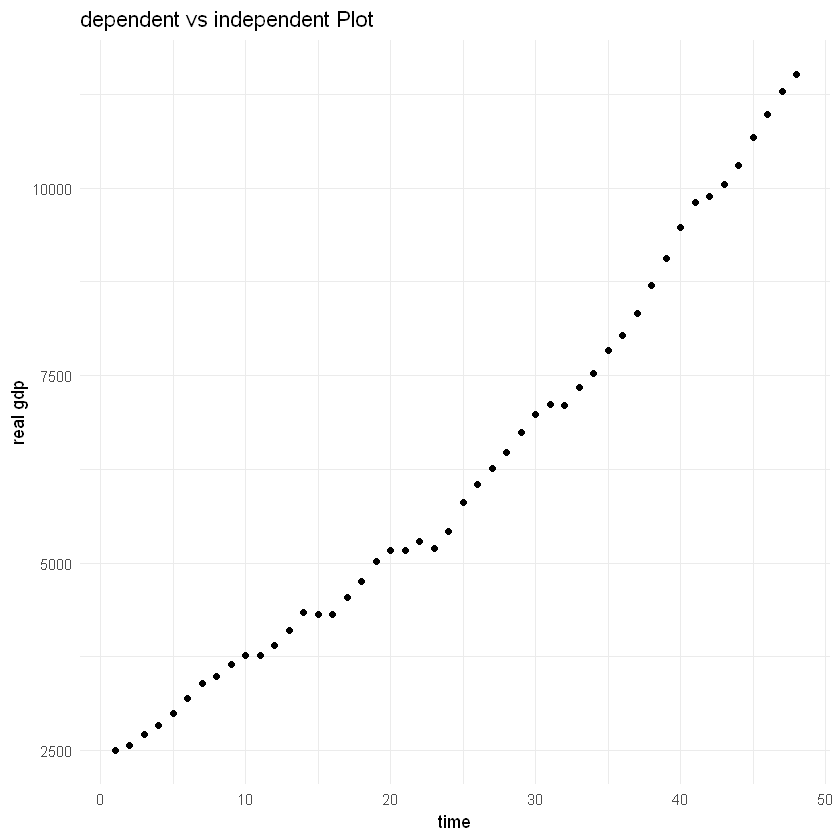

In [23]:
ggplot(df2, aes(x = time, y = rgdp)) +
  geom_point() +
  labs(title = "dependent vs independent Plot",
       x = "time",
       y = "real gdp") +
  theme_minimal()

## Lin-LOg model

$$
Y_i = \beta_0 + \beta_1 \ln X_i + u_i
$$

In [24]:
df3 <- read_excel("G:/Datasets/Econometrics BY Example/Excel/Table2_8.xls")
head(df3,3)
tail(df3,3)

fdho,expend,sfdho,lnexpend,expend_rec,expend2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6475,40516.75,0.15981045,10.609470,2.468115e-05,1641607040
3146,33540.50,0.09379705,10.420509,2.981470e-05,1124965120
1632,5181.85,0.31494543,8.552917,1.929813e-04,26851570


fdho,expend,sfdho,lnexpend,expend_rec,expend2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5811,31922.20,0.1820363,10.371057,3.132616e-05,1019026816
4594,25357.25,0.1811711,10.140820,3.943645e-05,642990144
2108,7313.60,0.2882302,8.897491,1.367316e-04,53488748


**Engel expenditure function theory:** the total
expenditure that is devoted to food tends to increase in arithmetic progression as
total expenditure increases in geometric proportion.   
In other words:  share of expenditure on food decreases as total expenditure increases

**Expend:** total household expenditure  
**SFDHO:** share of food expenditure  
869 US households in 1995

In [25]:
model6 <- lm(sfdho ~ lnexpend, data = df3)
tidy(model6)
glance(model6)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.93038679,0.036366542,25.58359,5.360528e-108
lnexpend,-0.07773725,0.003590929,-21.64823,2.011079e-83


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3508757,0.350127,0.06875045,468.6456,2.011079e-83,1,1094.493,-2182.986,-2168.684,4.097984,867,869


**lnexpend coefficient:** -0.08:  
if expenditure increases by 1%, on average, sfhdo decreases by 0.0008 units  
if expenditure increases by 100%, on average, sdfho decreases by 0.08 units

In [26]:
df3$residuals <- residuals(model6)
df3$fitted_values <- fitted(model6)

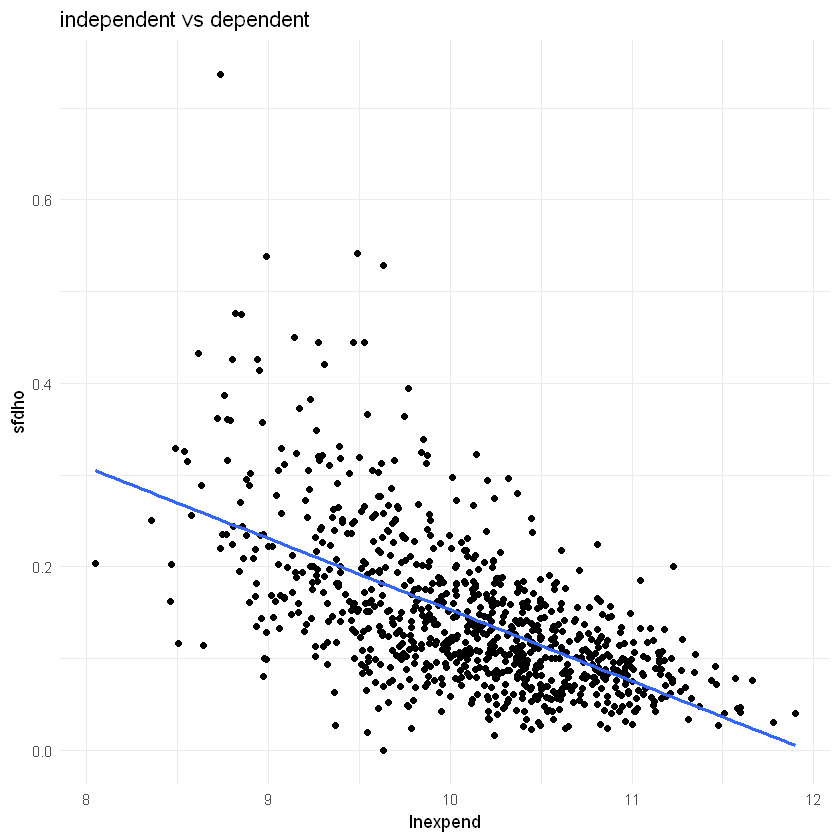

In [27]:
ggplot(df3, aes(x = lnexpend, y = sfdho)) +
  geom_point() +
  geom_smooth(method = 'lm',formula = y ~ x, se = FALSE) +
  labs(title = "independent vs dependent",
       x = "lnexpend",
       y = "sfdho") +
  theme_minimal()

## Reciprocol models

$$
Y_i = \beta_0 + \beta_1 \left(\frac{1}{X_i}\right) + u_i
$$

Note: 
$$
\frac{dY_i}{dX_i} = -\beta_1\left(\frac{1}{X_i}^2\right)
$$

In [28]:
model7 <- lm(sfdho ~ I(1/expend), data = df3)
tidy(model7)
glance(model7)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.726305e-02,0.004011685,19.2595,4.376382e-69
I(1/expend),1.331338e+03,63.957133553,20.8161,2.303454e-78


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3332359,0.3324669,0.06967833,433.31,2.303454e-78,1,1082.843,-2159.686,-2145.384,4.209346,867,869


**Intercept coeff:** if expend increases indefinitely, sfdho will equal 8% or 0.08

**slope coeff:** positive slope, rate of change of sfdho with respect to expenditure is **negative**

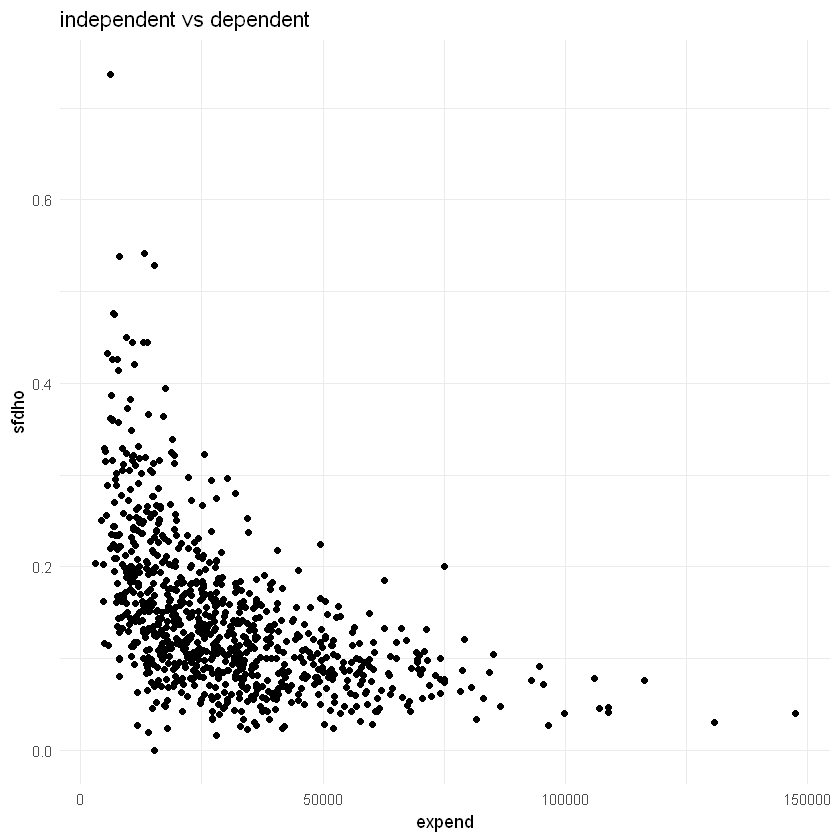

In [29]:
ggplot(df3, aes(x = expend, y = sfdho)) +
  geom_point() +
  labs(title = "independent vs dependent",
       x = "expend",
       y = "sfdho") +
  theme_minimal()

lin-log model performed better than reciprocol model based on $R^2$, both have same dependent variable so we can compare using it

In [30]:
summary(model6)$r.squared
summary(model7)$r.squared

[1] 0.3508757

[1] 0.3332359

## Polynomial regression model

$$ RGDP_t = \beta_0 + \beta_1 \text{time} + \beta_2 \text{time}^2 + u_t$$

In [31]:
model8 <- lm(rgdp ~ time + I(time^2), data = df2)
tidy(model8)
glance(model8)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2651.380622,69.4908403,38.15439,6.449733e-36
time,68.534362,6.5421140,10.47587,1.187953e-13
I(time^2),2.417542,0.1294432,18.67647,7.969017e-23


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9967866,0.9966438,153.8419,6979.431,8.066871e-57,2,-308.2845,624.5691,632.0539,1065030,45,48


$$
\frac{dRGDP}{dtime} = \beta_1 + 2\beta_2\text{time} = 68.53 + 4.84 \text{time}
$$

The **rate of change of RGDP** increases with an increasing rate  
unlike the linear model that showed constant rate $187


### Log-lin model with quadratic trend

$$ \ln RGDP_t = \beta_0 + \beta_1 \text{time} + \beta_2 \text{time}^2 + u_t$$

$$\frac{d \ln RGDP}{dtime} = \beta_1 + 2\beta_2\text{time} = 0.0365 - 0.0002\text{time}$$

The model increases with a decreasing rate  
unlike the quadratic RGDP model (model 8)

In [32]:
model9 <- lm(lnrgdp ~ time + I(time^2), data = df2)
tidy(model9)
glance(model9)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.8334797935,1.275348e-02,614.223018,6.228568e-90
time,0.0365514617,1.200658e-03,30.442868,1.147864e-31
I(time^2),-0.0001033042,2.375639e-05,-4.348483,7.756188e-05


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9960946,0.9959211,0.02823421,5738.809,6.492039e-55,2,104.6665,-201.333,-193.8482,0.03587268,45,48


**rate of growth of RGDP** decreases at rate 0.0002 per unit of time

## Comparing linear and log-log (log-linear) models

In [33]:
compare_models <- function(df, dependent_var, independent_vars) {
  library(dplyr)
  library(broom)
  
  # Step 1: Compute the geometric mean (GM) of the dependent variable
  geom_mean <- exp(mean(log(df[[dependent_var]])))
  
  # Step 2: Transform the dependent variable
  df <- df %>%
    mutate(transformed_output = .[[dependent_var]] / geom_mean,
           log_output = log(transformed_output))
  
  # Create formula strings for the models
  independent_vars_formula <- paste(independent_vars, collapse = " + ")
  linear_formula <- as.formula(paste("transformed_output ~", independent_vars_formula))
  log_linear_formula <- as.formula(paste("log_output ~", paste("log(", independent_vars, ")", collapse = " + ")))
  
  # Step 3: Estimate the linear model using transformed_output
  linear_model <- lm(linear_formula, data = df)
  linear_model_tidy <- tidy(linear_model)
  linear_model_rss <- sum(residuals(linear_model)^2)
  
  # Step 4: Estimate the log-linear model using log_output
  log_linear_model <- lm(log_linear_formula, data = df)
  log_linear_model_tidy <- tidy(log_linear_model)
  log_linear_model_rss <- sum(residuals(log_linear_model)^2)
  
  # Ensure residuals sum of squares matches expected values by directly comparing them
  rss1 <- sum((df$transformed_output - predict(linear_model))^2)
  rss2 <- sum((df$log_output - predict(log_linear_model))^2)
  
 # Number of observations
  n <- nrow(df)
  
  # Compute the likelihood ratio test statistic
  lambda <- (n / 2) * log(rss1 / rss2)
  
  # Compute the p-value from the chi-square distribution with 1 degree of freedom
  p_value <- pchisq(lambda, df = 1,)
  
  # Print results
  print(linear_model_tidy)
  print(log_linear_model_tidy)
  
  # Compare RSS
  print(paste("RSS for linear model:", rss1))
  print(paste("RSS for log-linear model:", rss2))
  print(paste("Lambda (test statistic):", lambda))
  print(paste("P-value:", p_value))
  
  return(list(
    linear_model = linear_model,
    log_linear_model = log_linear_model,
    linear_model_rss = rss1,
    log_linear_model_rss = rss2,
    lambda = lambda,
    p_value = p_value
  ))
}



In [34]:
compare_models(df, "output", c("labor", "capital"))

# A tibble: 3 × 5
  term           estimate    std.error statistic  p.value
  <chr>             <dbl>        <dbl>     <dbl>    <dbl>
1 (Intercept) 0.0103      0.0549           0.187 8.53e- 1
2 labor       0.00000211  0.000000310      6.80  1.50e- 8
3 capital     0.000000437 0.0000000429    10.2   1.43e-13
# A tibble: 3 × 5
  term         estimate std.error statistic  p.value
  <chr>           <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   -13.1      0.396     -32.9  1.30e-34
2 log(labor)      0.468    0.0989      4.73 1.98e- 5
3 log(capital)    0.521    0.0969      5.38 2.18e- 6
[1] "RSS for linear model: 3.67211242597136"
[1] "RSS for log-linear model: 3.41552013886784"
[1] "Lambda (test statistic): 1.84715109633792"
[1] "P-value: 0.825884897403209"


$linear_model

Call:
lm(formula = linear_formula, data = df)

Coefficients:
(Intercept)        labor      capital  
  1.026e-02    2.107e-06    4.369e-07  


$log_linear_model

Call:
lm(formula = log_linear_formula, data = df)

Coefficients:
 (Intercept)    log(labor)  log(capital)  
    -13.0538        0.4683        0.5213  


$linear_model_rss
[1] 3.672112

$log_linear_model_rss
[1] 3.41552

$lambda
[1] 1.847151

$p_value
[1] 0.8258849


## Regression on standardized variables

In [35]:
standardize_variables <- function(df, dependent_var, independent_vars) {
  # Standardize dependent variable
  df[[dependent_var]] <- scale(df[[dependent_var]], center = TRUE, scale = TRUE)
  
  # Standardize independent variables
  for (var in independent_vars) {
    df[[var]] <- scale(df[[var]], center = TRUE, scale = TRUE)
  }
  
  return(df)
}

# Example usage
# df_standardized <- standardize_variables(df, "output", c("labor", "capital"))


In [36]:
df_standardized <- standardize_variables(df, "output", c("labor", "capital"))

In [37]:
model10 <- lm(output ~ labor + capital, data = df_standardized)
tidy(model10)
glance(model10)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.433157e-17,0.01966566,1.237262e-15,1.000000e+00
labor,4.023881e-01,0.05918546,6.798766e+00,1.496564e-08
capital,6.021852e-01,0.05918546,1.017455e+01,1.433023e-13


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9810653,0.9802763,0.1404409,1243.514,4.510314e-42,2,29.29145,-50.58289,-42.85559,0.9467354,48,51


In [38]:
intercept = tidy(model10)[[1,2]]

ifelse(intercept < .Machine$double.eps,
                 paste(intercept, "is almost zero"),
                 paste(intercept, "is not almost zero"))

[1] "2.43315712814819e-17 is almost zero"

**labor coefficient:** if labor increases by one standard deviation unit, average value of output goes up by about 0.40 standard deviation units, cetris paribus

**capital coefficient:** if labor increases by one standard deviation unit, average value of output goes up by about 0.60 standard deviation units, cetris paribus

**Note:** same $R^2, t, F$  
does not mean that capital is more important than labor

## Regression through the origin: zero intercept model

### capital asset price model (CAPM)

\begin{align}
(ER_i-r_f) &= \beta_i(ER_m-r_f)\\
ER_i &= \text{expected rate of return on security}\\
ER_m &= \text{expected rate of return on market portfolio}\\
r_f &= \text{risk free rate of return} \\
\beta_i &= \text{systematic risk}
\end{align}

To estimate

$$ (R_i-r_f) = \beta_i(R_m-r_f) + u_i$$

Where $R_i, R_m$ are observed rates of return

Let

\begin{align}
Y_i = R_i - r_f = \text{rate of return on security i in excess of the risk-free rate of return}\\
X_i = R_m - r_f = \text{rate of return on market  in excess of the risk-free rate of return}
\end{align}

$$ Y_i = \beta X_i + u_i $$

In [39]:
df4 <- read_excel("G:/Datasets/Econometrics BY Example/Excel/Table2_15.xls")
head(df4,3)
dim(df4)

y,x
<dbl>,<dbl>
6.080228,7.263448
-0.924186,6.339896
-3.286174,-9.285217


[1] 240   2

In [40]:
model11 <- lm(y ~ 0 + x, data = df4)
model12 <- lm(y ~ x, data = df4)

In [41]:
tidy(model11)
glance(model11)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
x,1.155512,0.07439562,15.532,4.405444e-38


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5023352,0.5002529,5.548786,NA,NA,NA,-751.3032,1506.606,1513.568,7358.578,239,240


**Raw $R^2$:**  0.5  
proportion of variation around the origin

In [42]:
tidy(model12)
glance(model12)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.4474811,0.36294281,-1.232925,2.188203e-01
x,1.1711284,0.07538643,15.535004,4.752177e-38


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5034802,0.501394,5.542759,241.3363,4.752177e-38,1,-750.5392,1507.078,1517.52,7311.877,238,240


In [43]:
as.numeric(tidy(model12)[[1,'p.value']])

[1] 0.2188203

**Intercept:** not significant, use model11 instead

## Measures of goodness of fit

In [44]:
print(paste("R Squared: ",glance(model12)$r.squared))

[1] "R Squared:  0.503480169868958"


In [45]:
print(paste("Adjusted R Squared: ",glance(model12)$adj.r.squared))

[1] "Adjusted R Squared:  0.501393952095298"


In [46]:
print(paste("Akaike's Information Criteria: ", glance(model12)$AIC))

[1] "Akaike's Information Criteria:  1507.07843469119"


In [47]:
print(paste("Schwarz’s Information Criterion:",glance(model12)$BIC))

[1] "Schwarz’s Information Criterion: 1517.52035146121"


In [48]:
print(paste("Log Likelihood:",glance(model12)$logLik))

[1] "Log Likelihood: -750.539217345594"


In [49]:
colnames(glance(model12))

[1] "r.squared"     "adj.r.squared" "sigma"         "statistic"    
 [5] "p.value"       "df"            "logLik"        "AIC"          
 [9] "BIC"           "deviance"      "df.residual"   "nobs"

# Exercises

## 2.1
Consider the following production function, known in the literature as the
transcendental production function (TPF)


$$
Q_i = B_1L_i^{\beta_2} K_i^{\beta_3} e^{\beta_4L_i+ \beta_5K_i}  \\
$$
$\text{where Q, L, and K represent output, labor, and capital, respectively}$

### a
How would you linearize this function?

$$
\ln Q_i = \ln \beta_1 + \beta_2 \ln L_i + \beta_3 \ln K_i + \beta_4 L_i + \beta_5 K_i
$$

### b

What is the interpretation of the various coefficients in the TPF?

**$\beta_1$:** y intercept  
**labor:** elasticity = $\beta_2 + \beta_4 L_i$  
**capital:**: elasticity = $\beta_3 + \beta_5 K_i$

### c
Given the data in Table 2.1, estimate the parameters of the TPF

In [52]:
df5 <- read_excel("G:/Datasets/Econometrics BY Example/Excel/Table2_1.xls")
head(df5)

obs,output,labor,capital,lnoutput,lnlabor,lncapital,lnoutlab,lncaplab,outputstar,capitalstar,laborstar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38372840,424471,2689076,17.46286,12.958599,14.80471,4.504261,1.846109,-0.1079874,0.06368887,0.1343891
2,1805427,19895,57997,14.40631,9.898224,10.96815,4.508084,1.069923,-0.9230660,-0.90551400,-0.9410533
3,23736129,206893,2308272,16.98251,12.239957,14.65201,4.742552,2.412053,-0.4342360,-0.07658678,-0.4439759
4,26981983,304055,1376235,17.11068,12.624964,14.13486,4.485716,1.509898,-0.3618868,-0.41991854,-0.1857003
5,217546032,1809756,13554116,19.19792,14.408703,16.42220,4.789218,2.013498,3.8857391,4.06601191,3.8167481
6,19462751,180366,1790751,16.78401,12.102743,14.39815,4.681270,2.295402,-0.5294886,-0.26722449,-0.5144899


In [53]:
model13 <- lm(lnoutput ~ lnlabor + lncapital + labor + capital, data = df5)
tidy(model13)
glance(model13)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.949841e+00,5.660371e-01,6.9780608,9.829494e-09
lnlabor,5.208141e-01,1.347469e-01,3.8651277,3.465680e-04
lncapital,4.717828e-01,1.231899e-01,3.8297200,3.865161e-04
labor,-2.519414e-07,4.201003e-07,-0.5997173,5.516375e-01
capital,3.552743e-08,5.299532e-08,0.6703880,5.059624e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9645228,0.9614378,0.271165,312.6518,1.032818e-32,4,-3.17825,18.3565,29.94745,3.382401,46,51


In [58]:
(intercept <-exp(tidy(model13)[[1,2]]))

[1] 51.92713

In [64]:
df5 |> 
summarize(mean_labor = mean(labor),
         mean_capital = mean(capital))

mean_labor,mean_capital
<dbl>,<dbl>
373914.5,2516181


In [66]:
print(paste("elasticity of labor at mean:",5.208141e-01+ -2.519414e-07*373914.5 ))

[1] "elasticity of labor at mean: 0.4266095573897"


### d
Suppose you want to test the hypothesis that B4 = B5 = 0. How would you test these
hypotheses? Show the necessary calculations.

In [90]:
full_model <- lm(log(output) ~ log(labor) + log(capital) + labor + capital, data = df5)
restricted_model <- lm(log(output) ~ log(labor) + log(capital), data = df5)


(anova_result <- anova(restricted_model, full_model))

f_statistic <- anova_result$F[2]
p_value <- anova_result$`Pr(>F)`[2]

cat("F-statistic:", f_statistic, "\n")
cat("P-value:", p_value, "\n")

if (p_value < 0.05) {
  cat("Reject the null hypothesis: There is evidence that at least one of beta_4 or beta_5 is not equal to zero.\n")
} else {
  cat("Fail to reject the null hypothesis: There is no evidence that beta_4 or beta_5 are different from zero.\n")
}

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,48,3.415520,NA,NA,NA,NA
2,46,3.382404,2,0.03311649,0.2251887,0.7992404


F-statistic: 0.2251887 
P-value: 0.7992404 
Fail to reject the null hypothesis: There is no evidence that beta_4 or beta_5 are different from zero.


### e
How would you compute the output-labor and output capital elasticities for this model?
Are they constant or variable? 


variable